<h1>1</h1>
<h3>Prepare Dataset</h3>

In [4]:
import pandas as pd


data14_path = 'data/USMacro_Quarterly.xls'
data14 = pd.read_excel(data14_path, index_col=0)

<h2>E14.1</h2>

<h3>a</h3>

In [5]:
import numpy as np

# Y = log(RealGDP)
Y = data14.copy()
Y = np.log(Y['RealGDP'])
Y.name = 'Y'
# calculate Y_(t) - Y_(t-1)
delY = Y - Y.shift(1)
delY.name = 'delY'
delY_mean = (delY.iloc[4*(1955-1947):]).mean()

print('delYの平均の推定値', delY_mean)

delYの平均の推定値 0.008258661035799468


<h3>b</h3>

In [6]:
print('平均成長率(年率) : ', delY_mean*400, '[%]')

平均成長率(年率) :  3.3034644143197873 [%]


<h3>c</h3>

In [7]:
print('年率換算後のdelYの標準偏差 : ', delY.std()*400, '[%]')

年率換算後のdelYの標準偏差 :  3.991950751162082 [%]


<h3>d</h3>

In [8]:
import statsmodels.api as sm
print(sm.tsa.stattools.acf(delY.iloc[4*(1955-1947):], nlags=4))

[ 1.          0.28940872  0.17108983  0.02594531 -0.0239606 ]


<h2>E14.2</h2>

<h3>a</h3>

In [6]:
delY_1 = delY.copy()
delY_1 = delY_1.shift(1)
delY_1.name = 'delY(t-1)'
mod1 = sm.OLS(delY.iloc[4*(1955-1947):], sm.add_constant(delY_1.iloc[4*(1955-1947):]))
res1 = mod1.fit()
rob_res1 = res1.get_robustcov_results(cov_type='HC0')
print(rob_res1.summary())

                            OLS Regression Results                            
Dep. Variable:                   delY   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     15.61
Date:                Mon, 24 Jul 2017   Prob (F-statistic):           0.000108
Time:                        19:37:47   Log-Likelihood:                 663.85
No. Observations:                 200   AIC:                            -1324.
Df Residuals:                     198   BIC:                            -1317.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0058      0.001      6.039      0.0

<h3>b</h3>

In [7]:
delY_1 = delY.copy()
delY_1 = delY_1.shift(1)
delY_1.name = 'delY(t-1)'
delY_2 = delY.copy()
delY_2 = delY_2.shift(2)
delY_2.name = 'delY(t-2)'
mod2 = sm.OLS(delY.iloc[4*(1955-1947):], sm.add_constant(pd.concat((delY_1, delY_2), axis=1).iloc[4*(1955-1947):]))
res2 = mod2.fit()
rob_res2 = res2.get_robustcov_results(cov_type='HC0')
print(rob_res2.summary())

                            OLS Regression Results                            
Dep. Variable:                   delY   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     8.406
Date:                Mon, 24 Jul 2017   Prob (F-statistic):           0.000314
Time:                        19:37:48   Log-Likelihood:                 664.79
No. Observations:                 200   AIC:                            -1324.
Df Residuals:                     197   BIC:                            -1314.
Df Model:                           2                                         
Covariance Type:                  HC0                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0052      0.001      4.527      0.0

<h3>c</h3>

<h4>Calculating BIC Function</h4>

In [8]:
def BIC(p, T, SSR, model='autoregression'):
    if model=='autoregression':
        bic = np.log(SSR/T) + (p+1)*(np.log(T)/T)
    elif model=='multiautoregression':
        bic = np.log(SSR/T) + p*(np.log(T)/T)
    else:
        print('select appropriate model')
        bic = None
    return bic

<h4>Calculating AIC Function</h4>

In [9]:
def AIC(p, T, SSR, model='autoregression'):
    if model=='autoregression':
        aic = np.log(SSR/T) + (p+1)*(2/T)
    elif model=='multiautoregression':
        aic = np.log(SSR/T) + p*(2/T)
    else:
        print('select appropriate model')
        aic = None
    return aic

<h4>AR(3)</h4>

In [10]:
delY_1 = delY.copy()
delY_1 = delY_1.shift(1)
delY_1.name = 'delY(t-1)'
delY_2 = delY.copy()
delY_2 = delY_2.shift(2)
delY_2.name = 'delY(t-2)'
delY_3 = delY.copy()
delY_3 = delY_3.shift(3)
delY_3.name = 'delY(t-3)'
mod3 = sm.OLS(delY.iloc[4*(1955-1947):], sm.add_constant(pd.concat((delY_1, delY_2, delY_3), axis=1).iloc[4*(1955-1947):]))
res3 = mod3.fit()
rob_res3 = res3.get_robustcov_results(cov_type='HC0')
print(rob_res3.summary())

                            OLS Regression Results                            
Dep. Variable:                   delY   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     5.729
Date:                Mon, 24 Jul 2017   Prob (F-statistic):           0.000888
Time:                        19:37:51   Log-Likelihood:                 665.15
No. Observations:                 200   AIC:                            -1322.
Df Residuals:                     196   BIC:                            -1309.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0055      0.001      4.575      0.0

<h4>AR(4)</h4>

In [11]:
delY_1 = delY.copy()
delY_1 = delY_1.shift(1)
delY_1.name = 'delY(t-1)'
delY_2 = delY.copy()
delY_2 = delY_2.shift(2)
delY_2.name = 'delY(t-2)'
delY_3 = delY.copy()
delY_3 = delY_3.shift(3)
delY_3.name = 'delY(t-3)'
delY_4 = delY.copy()
delY_4 = delY_4.shift(4)
delY_4.name = 'delY(t-4)'
mod4 = sm.OLS(delY.iloc[4*(1955-1947):], sm.add_constant(pd.concat((delY_1, delY_2, delY_3, delY_4), axis=1).iloc[4*(1955-1947):]))
res4 = mod4.fit()
rob_res4 = res4.get_robustcov_results(cov_type='HC0')
print(rob_res4.summary())

                            OLS Regression Results                            
Dep. Variable:                   delY   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     4.428
Date:                Mon, 24 Jul 2017   Prob (F-statistic):            0.00190
Time:                        19:37:52   Log-Likelihood:                 665.44
No. Observations:                 200   AIC:                            -1321.
Df Residuals:                     195   BIC:                            -1304.
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0058      0.001      4.543      0.0

<h4>ⅰ</h4>

In [12]:
T = 4 * (2004 - 1955 + 1)
bic1 = BIC(1, T, rob_res1.ssr)
bic2 = BIC(2, T, rob_res2.ssr)
bic3 = BIC(3, T, rob_res3.ssr)
bic4 = BIC(4, T, rob_res4.ssr)
print('BIC(1) : ', bic1)
print('BIC(2) : ', bic2)
print('BIC(3) : ', bic3)
print('BIC(4) : ', bic4)

BIC(1) :  -9.42338081603
BIC(2) :  -9.40626294325
BIC(3) :  -9.38343848493
BIC(4) :  -9.35984498851


<h4>ⅱ</h4>

In [13]:
T = 4 * (2004 - 1955 + 1)
aic1 = AIC(1, T, rob_res1.ssr)
aic2 = AIC(2, T, rob_res2.ssr)
aic3 = AIC(3, T, rob_res3.ssr)
aic4 = AIC(4, T, rob_res4.ssr)
print('AIC(1) : ', aic1)
print('AIC(2) : ', aic2)
print('AIC(3) : ', aic3)
print('AIC(4) : ', aic4)

AIC(1) :  -9.4563639897
AIC(2) :  -9.45573770375
AIC(3) :  -9.44940483226
AIC(4) :  -9.44230292268


<h2>E14.3</h2>

<h4>Rrepare Data to model AR</h4>

In [32]:
delY_5 = delY.copy()
delY_5 = delY_5.shift(5)
delY_5.name = 'delY(t-5)'
Y_1 = Y.copy()
Y_1 = Y_1.shift(1)
Y_1.name = 'Y(t-1)'
t = pd.Series(range(1, 4 * (2004 - 1955 + 1)+1))
t.name = 't'

<h4>Create Models</h4>

In [42]:
regressor1 = pd.concat((Y_1, delY_1), axis=1).iloc[4*(1955-1947):]
t.index = regressor1.index
mod1 = sm.OLS(delY.iloc[4*(1955-1947):], sm.add_constant(pd.concat((t, regressor1), axis=1)))
res1 = mod1.fit()
regressor2 = pd.concat((Y_1, delY_1, delY_2), axis=1).iloc[4*(1955-1947):]
mod2 = sm.OLS(delY.iloc[4*(1955-1947):], sm.add_constant((pd.concat((t, regressor2), axis=1))))
res2 = mod2.fit()
regressor3 = pd.concat((Y_1, delY_1, delY_2, delY_3), axis=1).iloc[4*(1955-1947):]
mod3 = sm.OLS(delY.iloc[4*(1955-1947):], sm.add_constant((pd.concat((t, regressor3), axis=1))))
res3 = mod3.fit()
regressor4 = pd.concat((Y_1, delY_1, delY_2, delY_3, delY_4), axis=1).iloc[4*(1955-1947):]
mod4 = sm.OLS(delY.iloc[4*(1955-1947):], sm.add_constant((pd.concat((t, regressor4), axis=1))))
res4 = mod4.fit()
regressor5 = pd.concat((Y_1, delY_1, delY_2, delY_3, delY_4, delY_5), axis=1).iloc[4*(1955-1947):]
mod5 = sm.OLS(delY.iloc[4*(1955-1947):], sm.add_constant((pd.concat((t, regressor5), axis=1))))
res5 = mod5.fit()

In [43]:
T = 4 * (2004 - 1955 + 1)
aic1_e143 = AIC(1, T, res1.ssr, model='autoregression')
aic2_e143 = AIC(2, T, res2.ssr, model='autoregression')
aic3_e143 = AIC(3, T, res3.ssr, model='autoregression')
aic4_e143 = AIC(4, T, res4.ssr, model='autoregression')
aic5_e143 = AIC(5, T, res5.ssr, model='autoregression')
print('AIC(1) : ', aic1_e143)
print('AIC(2) : ', aic2_e143)
print('AIC(3) : ', aic3_e143)
print('AIC(4) : ', aic4_e143)
print('AIC(5) : ', aic5_e143)

AIC(1) :  -9.48976607494
AIC(2) :  -9.49567276623
AIC(3) :  -9.48642996033
AIC(4) :  -9.47691762373
AIC(5) :  -9.47737488634


<h4>ADF test</h4>

In [76]:
res_adf_14_3 = sm.tsa.stattools.adfuller(Y.iloc[4*(1955-1947)-3:], maxlag=2, regression='ct', autolag=None)
print('ADF統計量 : ', res_adf_14_3[0])
print('P値 : ', res_adf_14_3[1])
print('臨界値 : ', res_adf_14_3[4])

ADF統計量 :  -2.7716317618
P値 :  0.207558784097
臨界値 :  {'1%': -4.0047629693750002, '10%': -3.1400789225000003, '5%': -3.4326735717499997}


<h1>2</h1>

<h3>Prepare Dataset</h3>

In [17]:
import pandas as pd

f = '%Y:%m'
my_parser = lambda date: pd.datetime.strptime(date, f)

data15_path = 'data/USMacro_Monthly.xls'
data15 = pd.read_excel(data15_path, index_col=0)
data15.index = data15.index.to_series().apply(lambda x: x.strip())
data15.index = pd.to_datetime(data15.index, format='%Y:%m')

<h2>15.2</h2>

<h3>a, b</h3>

In [43]:
data_oil = data15['Oil'].iloc[11:]
new_oil = []
for max_oil in data_oil.groupby(pd.TimeGrouper(freq='3m')).aggregate(np.sum)[1:]:
    new_oil.append(max_oil)

oil = pd.Series(new_oil)

In [44]:
import pandas as pd
import numpy as np

# Set dynamic multiplier 
beta1 = [0.062, 0.048, -0.014, -0.086, 0, 0.023, -0.01, -0.1, -0.014]
# Set SE of dynamic multiplier
se_beta1 = [0.045, 0.034, 0.028, 0.169, 0.058, 0.065, 0.047, 0.038, 0.025]
# Set intercept and SE of it
intercept = 0.07
intercept_SE = 0.06

effect = [25*i for i in beta1]
pred_val = [25*i+intercept for i in beta1]

O_mean = []
for lag in range(9):
    O_lag_mean = (oil.iloc[4*(1955-1948)-lag:-4*(2004-2000)-lag]).mean()*100
    O_mean.append(O_lag_mean)
    
def V_R(se_beta0, se_beta1, mean):
    COV_beta01 = 25*(-mean * se_beta1**2)
    V_R = se_beta0**2 + (se_beta1*25)**2 + 2*COV_beta01
    
    return V_R

lower_thres = []
upper_thres = []
for val, mean, se in zip(pred_val, O_mean, se_beta1):
    se_R = np.sqrt(V_R(se_beta0=intercept_SE, se_beta1=se, mean=mean))
    lower_thres.append(val-1.96*se_R)
    upper_thres.append(val+1.96*se_R)
    
thres = [[lower, upper] for lower, upper in zip(lower_thres, upper_thres)]
data = {'Dynamic multiplier' : beta1, 
        'Predicted effect on output rate' : effect,
        'Predicted value' : pred_val,
        '95% confidence interval of Predicted value' : thres
       }
         
result = pd.DataFrame(data, columns=['Dynamic multiplier', 'Predicted effect on output rate', 'Predicted value', '95% confidence interval of Predicted value'])
result.index.name = 'Period ahead'
result

,Dynamic multiplier,Predicted effect on output rate,Predicted value,95% confidence interval of Predicted value
Period ahead,,,,
0,0.062,1.550,1.620,"[-0.347463480664, 3.58746348066]"
1,0.048,1.200,1.270,"[-0.219105368492, 2.75910536849]"
2,-0.014,-0.350,-0.280,"[-1.51095198242, 0.950951982416]"
3,-0.086,-2.150,-2.080,"[-9.48334888702, 5.32334888702]"
4,0.000,0.000,0.070,"[-2.48793528176, 2.62793528176]"
5,0.023,0.575,0.645,"[-2.22739723393, 3.51739723393]"
6,-0.010,-0.250,-0.180,"[-2.27571579845, 1.91571579845]"
7,-0.100,-2.500,-2.430,"[-4.13330191641, -0.726698083592]"
8,-0.014,-0.350,-0.280,"[-1.40332382562, 0.843323825618]"


<h2>c</h2>

In [24]:
np.sum(effect)

-2.2749999999999999

<h2>d</h2>

レポート参照

<h1>15.6</h1>
レポート参照

<h1>E15.1</h1>
<h2>a</h2>

In [19]:
import datetime as dt
ip_all = data15['IP']
ip_growth_all = 100*(np.log(ip_all)-(np.log(ip_all)).shift(1))

start = dt.datetime(1952, 1, 1)
end = dt.datetime(2004, 12, 1)
ip_growth = ip_growth_all[(ip_growth_all.index>=start) & (ip_growth_all.index<=end)]

mean_ip_growth = ip_growth.mean()
std_ip_growth = ip_growth.std()

print('平均 : ', mean_ip_growth)
print('標準偏差 : ', std_ip_growth)

平均 :  0.26860657702507207
標準偏差 :  0.9442548928737147


<h2>b</h2>

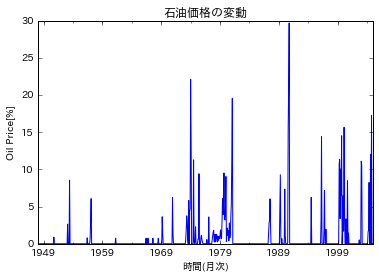

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

oil_sample = data_oil.iloc[1:]*100
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
oil_sample.plot(ax=ax)
ax.set_xlabel('時間(月次)')
ax.set_ylabel('Oil Price[%]')
ax.set_title('石油価格の変動')
plt.savefig("output/e15_1_b.png", format='png', dpi=500)
plt.show()

<h2>c<h2>

In [51]:
import statsmodels.api as sm

oil_lag = []
for lag in range(19):
    shift_data = data_oil.shift(lag)
    shift_data = shift_data[(shift_data.index>=start)&(shift_data.index<=end)]
    if lag==0:
        shift_data.name = 'O_t'
    else :
        shift_data.name = 'O_(t-' + str(lag) + ')'
    oil_lag.append(shift_data)

oil_lag = pd.DataFrame(oil_lag).T
mod_oil18 = sm.OLS(ip_growth, sm.add_constant(oil_lag*100))
res_oil18 = mod_oil18.fit()
m = 0.75*(oil_lag.shape[0])**(1/3)
m = int(np.ceil(m))
rob_res_oil18 = res_oil18.get_robustcov_results(cov_type='HAC', maxlags=m)
print(rob_res_oil18.summary())

                            OLS Regression Results                            
Dep. Variable:                     IP   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1.832
Date:                Wed, 26 Jul 2017   Prob (F-statistic):             0.0168
Time:                        17:05:04   Log-Likelihood:                -846.80
No. Observations:                 636   AIC:                             1734.
Df Residuals:                     616   BIC:                             1823.
Df Model:                          19                                         
Covariance Type:                  HAC                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.3930      0.064      6.187      0.0

<h3>d</h3>

In [50]:
A = np.concatenate((np.zeros((19, 1)), np.eye(19)), axis=1)
print(rob_res_oil18.f_test(A))

<F test: F=array([[ 1.83224567]]), p=0.016804538092244265, df_denom=616, df_num=19>


<h2>e</h2>

<h3>動学乗数</h3>

In [72]:
params = rob_res_oil18.params[1:]
upper = params + 1.96*rob_res_oil18.bse[1:]
lower = params - 1.96*rob_res_oil18.bse[1:]

<h3>累積的な動学乗数</h3>

In [74]:
oil_lag_cumul = []
for col in range(18):
    del_oil = oil_lag.iloc[:, col]-oil_lag.iloc[:, col+1]
    if (col==0):
        del_oil.name = 'ΔO_(t)'
    else:
        del_oil.name = 'ΔO_(t-' + str(col) + ')'
    oil_lag_cumul.append(del_oil)
oil_lag_cumul.append(oil_lag.iloc[:, 18])
oil_lag_cumul = pd.DataFrame(oil_lag_cumul).T

mod_oil18_cumul = sm.OLS(ip_growth, sm.add_constant(oil_lag_cumul*100))
res_oil18_cumul = mod_oil18_cumul.fit()
m_cumul = 0.75*(oil_lag_cumul.shape[0])**(1/3)
m_cumul = int(np.ceil(m_cumul))
rob_res_oil18_cumul = res_oil18_cumul.get_robustcov_results(cov_type='HAC', maxlags=m_cumul)
print(rob_res_oil18_cumul.summary())

params_cumul = rob_res_oil18_cumul.params[1:]
upper_cumul = params_cumul + 1.96*rob_res_oil18_cumul.bse[1:]
lower_cumul = params_cumul - 1.96*rob_res_oil18_cumul.bse[1:]

                            OLS Regression Results                            
Dep. Variable:                     IP   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1.832
Date:                Wed, 26 Jul 2017   Prob (F-statistic):             0.0168
Time:                        17:27:34   Log-Likelihood:                -846.80
No. Observations:                 636   AIC:                             1734.
Df Residuals:                     616   BIC:                             1823.
Df Model:                          19                                         
Covariance Type:                  HAC                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.3930      0.064      6.187      0.0

<h3>グラフ化</h3>

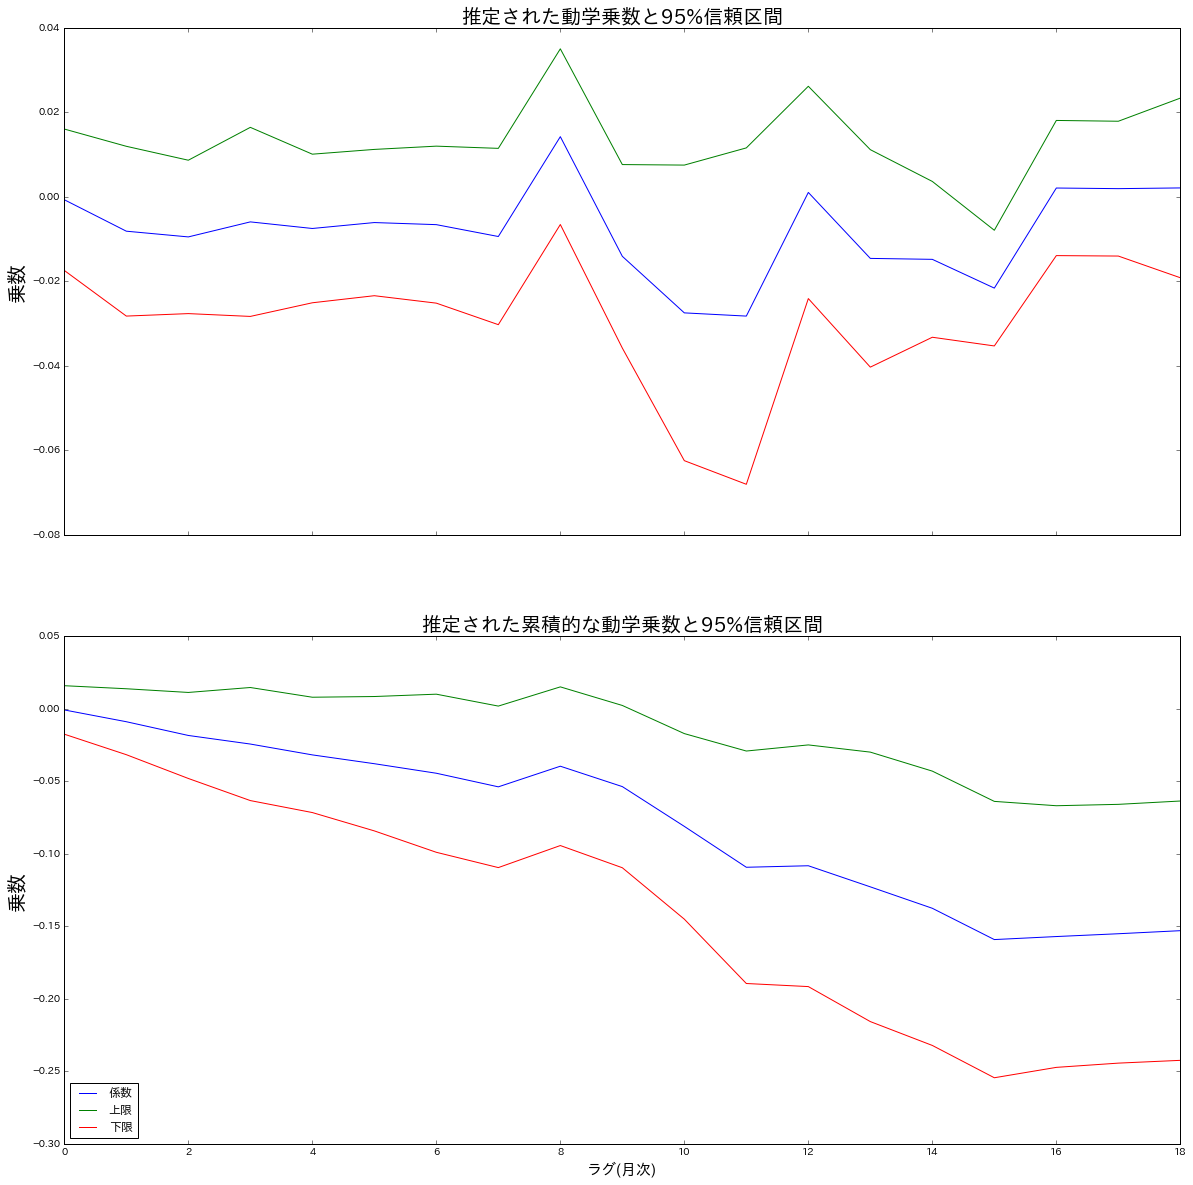

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(20, 20))

axs[0].plot(params, label='係数')
axs[0].plot(upper, label='上限')
axs[0].plot(lower, label='下限')
axs[0].set_title('推定された動学乗数と95%信頼区間', size=20)
axs[0].set_ylabel('乗数', size=20)

axs[1].plot(params_cumul, label='係数')
axs[1].plot(upper_cumul, label='上限')
axs[1].plot(lower_cumul, label='下限')
axs[1].set_title('推定された累積的な動学乗数と95%信頼区間', size=20)
axs[1].set_xlim([0, 18])
axs[1].set_ylabel('乗数', size=20)
axs[1].set_xlabel('ラグ(月次)', size=15)

plt.legend(loc='lower left')

plt.savefig("output/e15_1_e.png", format='png', dpi=500)
plt.show()

<h1>E15.2</h1>
<h2>a</h2>

In [20]:
cpi = data15['CPI']
pced = data15['PCED']

pi_cpi_all = 1200*(np.log(cpi)-np.log(cpi.shift(1)))
pi_pced_all = 1200*(np.log(pced)-np.log(pced.shift(1)))

start = dt.datetime(1959, 2, 1)
end = dt.datetime(2004, 12, 1)

pi_cpi = pi_cpi_all[(pi_cpi_all.index>=start)&(pi_cpi_all.index<=end)]
pi_pced = pi_pced_all[(pi_pced_all.index>=start)&(pi_pced_all.index<=end)]

pi_cpi_mean = pi_cpi.mean()
pi_pced_mean = pi_pced.mean()
print('pi_cpiの平均 : ', pi_cpi_mean)
print('pi_pcedの平均 : ', pi_pced_mean)

pi_cpiの平均 :  4.106742800328103
pi_pcedの平均 :  3.666973293516381


<h2>b</h2>

In [21]:
Y_pi = pi_cpi - pi_pced
Y_pi_mean = Y_pi.mean()

print('Yの平均 : ', Y_pi_mean)
print('(a)で求めた2つの平均の差 : ', pi_cpi_mean-pi_pced_mean)

Yの平均 :  0.43976950681172416
(a)で求めた2つの平均の差 :  0.439769506811722


<h2>c, d</h2>
レポート参照

<h2>e</h2>

In [441]:
intercept = pd.Series(np.ones(len(Y_pi)))
intercept.name = 'beta_0'
intercept.index = Y_pi.index
mod_Y_pi = sm.OLS(Y_pi, intercept)
res_Y_pi = mod_Y_pi.fit()
m_pi = 0.75*(Y_pi.shape[0])**(1/3)
m_pi = int(np.ceil(m_pi))
rob_res_Y_pi = res_Y_pi.get_robustcov_results(cov_type='HAC', maxlags=m_pi)

upper = rob_res_Y_pi.params[0] + 1.96 * rob_res_Y_pi.bse[0]
lower = rob_res_Y_pi.params[0] - 1.96 * rob_res_Y_pi.bse[0]
print('beta_0の95%信頼区間 : ', [lower, upper])

beta_0の95%信頼区間 :  [0.26488884666173251, 0.6146501669617167]


<h2>f</h2>

In [442]:
print('HAC t統計量 : ', rob_res_Y_pi.tvalues[0])
print('p値 : ', rob_res_Y_pi.pvalues[0])

HAC t統計量 :  4.92877961812
p値 :  1.09687191647e-06


<h2>16.2</h2>
レポート参照

<h2>E16.1<h2>

In [402]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

f = '%Y:%m'
my_parser = lambda date: pd.datetime.strptime(date, f)

R = data14['TbillRate']

delY.name = 'delY'
delR = R - R.shift(1)
delR.name = 'delR'

D_var = pd.concat((delY.iloc[4*(1955-1947):], delR.iloc[4*(1955-1947):]), axis=1)
D_var.index = D_var.index.to_series().apply(lambda x: x.strip())
D_var.index = pd.to_datetime(D_var.index, format='%Y:%m')

model_var = sm.tsa.VAR(D_var)
res_var = model_var.fit(maxlags=4)
print(res_var.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 23, Jul, 2017
Time:                     22:20:33
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -9.98466
Nobs:                     196.000    HQIC:                  -10.1638
Log likelihood:           469.776    FPE:                3.41214e-05
AIC:                     -10.2857    Det(Omega_mle):     3.11912e-05
--------------------------------------------------------------------
Results for equation delY
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           0.004454         0.001118            3.985           0.000
L1.delY         0.217472         0.072969            2.980           0.003
L1.delR         0.001480         0.000903            1.639           0.103
L2.delY   

<h3>a</h3>

In [303]:
print('########## Granger causality test from delR to delY ##########')
print(res_var.test_causality('delY', ['delR'], kind='f'))
print()
print('########## Granger causality test from delY to delR ##########')
print(res_var.test_causality('delR', ['delY'], kind='f'))

########## Granger causality test from delR to delY ##########
Granger causality f-test
   Test statistic   Critical Value          p-value        df
-------------------------------------------------------------
         6.924540         2.395809            0.000  (4, 374)
H_0: ['delR'] do not Granger-cause delY
Conclusion: reject H_0 at 5.00% significance level
{'conclusion': 'reject', 'crit_value': 2.3958090101870937, 'df': (4, 374), 'statistic': 6.9245404083538196, 'signif': 0.05, 'pvalue': 2.190537643807617e-05}

########## Granger causality test from delY to delR ##########
Granger causality f-test
   Test statistic   Critical Value          p-value        df
-------------------------------------------------------------
         4.291236         2.395809            0.002  (4, 374)
H_0: ['delY'] do not Granger-cause delR
Conclusion: reject H_0 at 5.00% significance level
{'conclusion': 'reject', 'crit_value': 2.3958090101870937, 'df': (4, 374), 'statistic': 4.2912364304120754, 'sig

<h3>b</h3>

In [304]:
model_var.select_order()

                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0        -10.04       -10.01    4.345e-05       -10.03
1        -10.12       -10.02    4.009e-05       -10.08
2        -10.27      -10.10*    3.461e-05       -10.20
3        -10.32       -10.08    3.301e-05       -10.22
4        -10.35       -10.03    3.212e-05       -10.22
5        -10.45       -10.07    2.887e-05      -10.30*
6        -10.42       -9.968    2.989e-05       -10.24
7        -10.41       -9.893    3.004e-05       -10.20
8        -10.40       -9.810    3.047e-05       -10.16
9        -10.43       -9.768    2.966e-05       -10.16
10       -10.45       -9.721    2.902e-05       -10.15
11      -10.49*       -9.688   2.801e-05*       -10.16
12       -10.45       -9.584    2.902e-05       -10.10
13       -10.44       -9.506    2.929e-05       -10.06
14       -10.42       -9.414    2.997e-05       -10.01
* Minimum


{'aic': 11, 'bic': 2, 'fpe': 11, 'hqic': 5}

<h2>E16.3</h2>

In [14]:
from arch.unitroot import DFGLS
dfgls = DFGLS(Y.iloc[4*(1955-1947)-3:], lags=2, trend='ct')
print(dfgls.summary())
print('p値 : ', dfgls.pvalue)

      Dickey-Fuller GLS Results      
Test Statistic                 -2.216
P-value                         0.206
Lags                                2
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.51 (1%), -2.94 (5%), -2.65 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
p値 :  0.206227662426


<h2>E16.4</h2>

<h3>a</h3>

In [22]:
print('########## ADF TEST ##########')
print(sm.tsa.stattools.adfuller(Y_pi, maxlag=12, regression='c', autolag=None))
print('########## DF-GLS TEST ##########')
dfgls_pi = DFGLS(Y_pi, lags=12, trend='c')
print(dfgls_pi.summary())

########## ADF TEST ##########
(-5.0118851135846194, 2.1022024132820697e-05, 12, 538, {'1%': -3.442563336759378, '5%': -2.8669271900049469, '10%': -2.5696391843672695})
########## DF-GLS TEST ##########
      Dickey-Fuller GLS Results      
Test Statistic                 -3.103
P-value                         0.002
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -2.61 (1%), -1.98 (5%), -1.66 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


<h3>b</h3>

In [23]:
print('########## ADF TEST for pi_cpi ##########')
print(sm.tsa.stattools.adfuller(pi_cpi, maxlag=12, regression='c', autolag=None))
print('########## DF-GLS TEST for pi_cpi ##########')
dfgls_pi_cpi = DFGLS(pi_cpi, lags=12, trend='c')
print(dfgls_pi_cpi.summary())

print()

print('########## ADF TEST for pi_pced ##########')
print(sm.tsa.stattools.adfuller(pi_pced, maxlag=12, regression='c', autolag=None))
print('########## DF-GLS TEST for pi_pced ##########')
dfgls_pi_pced = DFGLS(pi_pced, lags=12, trend='c')
print(dfgls_pi_pced.summary())

########## ADF TEST for pi_cpi ##########
(-2.6062021716665789, 0.09172216814034917, 12, 538, {'1%': -3.442563336759378, '5%': -2.8669271900049469, '10%': -2.5696391843672695})
########## DF-GLS TEST for pi_cpi ##########
      Dickey-Fuller GLS Results      
Test Statistic                 -1.399
P-value                         0.156
Lags                               12
-------------------------------------

Trend: Constant
Critical Values: -2.61 (1%), -1.98 (5%), -1.66 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

########## ADF TEST for pi_pced ##########
(-2.2689652569910321, 0.18217269328174079, 12, 538, {'1%': -3.442563336759378, '5%': -2.8669271900049469, '10%': -2.5696391843672695})
########## DF-GLS TEST for pi_pced ##########
      Dickey-Fuller GLS Results      
Test Statistic                 -1.269
P-value                         0.195
Lags                               12
--------------------------------

<h2>c</h2>
レポート参照
<h2>d</h2>

In [25]:
# test if cointegrated
mod_cointeg = sm.OLS(pi_cpi, sm.add_constant(pi_pced))
res_cointeg = mod_cointeg.fit()
resid_cointeg = res_cointeg.resid

print('### 帰無仮説を定常的とした時のADFテスト ###')
adf_c_16_4 = sm.tsa.stattools.adfuller(resid_cointeg, regression='c', autolag='AIC')
print('ADF統計量 : ', adf_c_16_4[0])
print('P値 : ', adf_c_16_4[1])
print('臨界値 : ', adf_c_16_4[4])
print('### 帰無仮説を決定論的な線形の時間トレンド周りで定常とした時のADFテスト ###')
adf_ct_16_4 = sm.tsa.stattools.adfuller(resid_cointeg, regression='ct', autolag='AIC')
print('ADF統計量 : ', adf_ct_16_4[0])
print('P値 : ', adf_ct_16_4[1])
print('臨界値 : ', adf_ct_16_4[4])

# DOLS
del_pi_pced = pi_pced - pi_pced.shift(1)
del_pi_pced_lag = []
for lag in range(-6, 7):
    add_pi_pced = del_pi_pced.shift(-lag)
    if lag == 0:
        add_pi_pced.name = 'del_pi_pced(t)'
    else:
        if lag>0:
            add_pi_pced.name = 'del_pi_pced(t+'+str(lag)+')'
        else:
            add_pi_pced.name = 'del_pi_pced(t'+str(lag)+')'
    del_pi_pced_lag.append(add_pi_pced)
del_pi_pced_lag = pd.DataFrame(del_pi_pced_lag).T
pi_pced.name = 'pi_pced(t)'
data_dols = pd.concat((pi_pced, del_pi_pced_lag), axis=1)

# remove null
start_thres = dt.datetime(1959, 9, 1)
end_thres = dt.datetime(2004, 6, 1)
data_dols = data_dols[(data_dols.index>=start_thres)&(data_dols.index<=end_thres)]

# # estimate coefficient of pi_pced by OLS regression
mod_dols = sm.OLS(pi_cpi[(pi_cpi.index>=start_thres)&(pi_cpi.index<=end_thres)], sm.add_constant(data_dols))
res_dols = mod_dols.fit()
print(res_dols.summary())

### 帰無仮説を定常的とした時のADFテスト ###
ADF統計量 :  -14.400084133
P値 :  8.53763127743e-27
臨界値 :  {'1%': -3.4423174665535385, '5%': -2.8668189527327539, '10%': -2.5695815056021711}
### 帰無仮説を決定論的な線形の時間トレンド周りで定常とした時のADFテスト ###
ADF統計量 :  -14.4769592534
P値 :  4.5250858701e-22
臨界値 :  {'1%': -3.9753552942175947, '5%': -3.4185173398178894, '10%': -3.1317728116861834}
                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     142.1
Date:                Thu, 27 Jul 2017   Prob (F-statistic):          6.94e-168
Time:                        01:46:10   Log-Likelihood:                -1029.7
No. Observations:                 538   AIC:                             2089.
Df Residuals:                     523   BIC:                             2154.
Df Model:           

<h1>4</h1>
<h2>(1)<h2>

<h3>Prepare Dataset</h3>

In [7]:
import pandas as pd
import datetime as dt
import numpy as np

# r
r_secured_path = 'data/extra/r_secured.csv'
r_unsecured_path = 'data/extra/r_unsecured.csv'

r_secured = pd.read_csv(r_secured_path, header=1, index_col=0, parse_dates=[0], encoding='shift_jis')
r_secured = r_secured[r_secured.index<dt.datetime(1985, 7, 1)].astype(float)
r_unsecured = pd.read_csv(r_unsecured_path, header=1, index_col=0, parse_dates=[0], encoding='shift_jis')
r_unsecured = r_unsecured[(r_unsecured.index>=dt.datetime(1985, 7, 1))&(r_unsecured.index<=dt.datetime(1998, 4, 1))].astype(float)

r_secured_mean = r_secured.mean()
r_unsecured_mean = r_unsecured.mean()
r_secured_revised = r_secured + (r_secured_mean[0] - r_unsecured_mean[0])

r = np.vstack((r_secured_revised, r_unsecured))
r = pd.DataFrame(r, index=(r_secured_revised.index.tolist()+r_unsecured.index.tolist()), columns=['r'])

# m
m_path = 'data/extra/m.csv'
m = pd.read_csv(m_path, header=1, index_col=0, parse_dates=[0], encoding='shift_jis')
m = m[m.index<=dt.datetime(1998, 4 , 1)]
m.columns = ['m']
m = 100 * np.log(m)

# p
p_path = 'data/extra/p.csv'
p = pd.read_csv(p_path, header=0, index_col=0, parse_dates=[0])['Close Price']
p = pd.DataFrame(p[::-1])
p.columns = ['p']
p.index = r.index
p = 100 * np.log(p)

# y
IFS_path = 'data/extra/IFS.csv'
IFS = pd.read_csv(IFS_path)
y = IFS[(IFS.iloc[:, 0]=='Japan')&(IFS.iloc[:, 2]=='Industrial Production, Index')]
y = y.iloc[0, :]
y = y[y.index.to_series().apply(lambda x: 'M' in x)][:-1]
y.index = p.index
y = pd.DataFrame(y)
y.columns = ['y']
y = y.astype(float)
y = 100 * np.log(y)

/Users/miura/.pyenv/versions/anaconda3-2.4.1/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (5,16,17,23,29,37,53,64,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,124,125,126,127,128,129,130,131,132,133,134,135,136,137,145,149,151,153,154,155,173,190,191,194,197,202,209,214,215,220,221,224,225,226,227,233,244,245,251,254,257,269,273,281) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<h3>Plot</h3>

/Users/miura/.pyenv/versions/anaconda3-2.4.1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


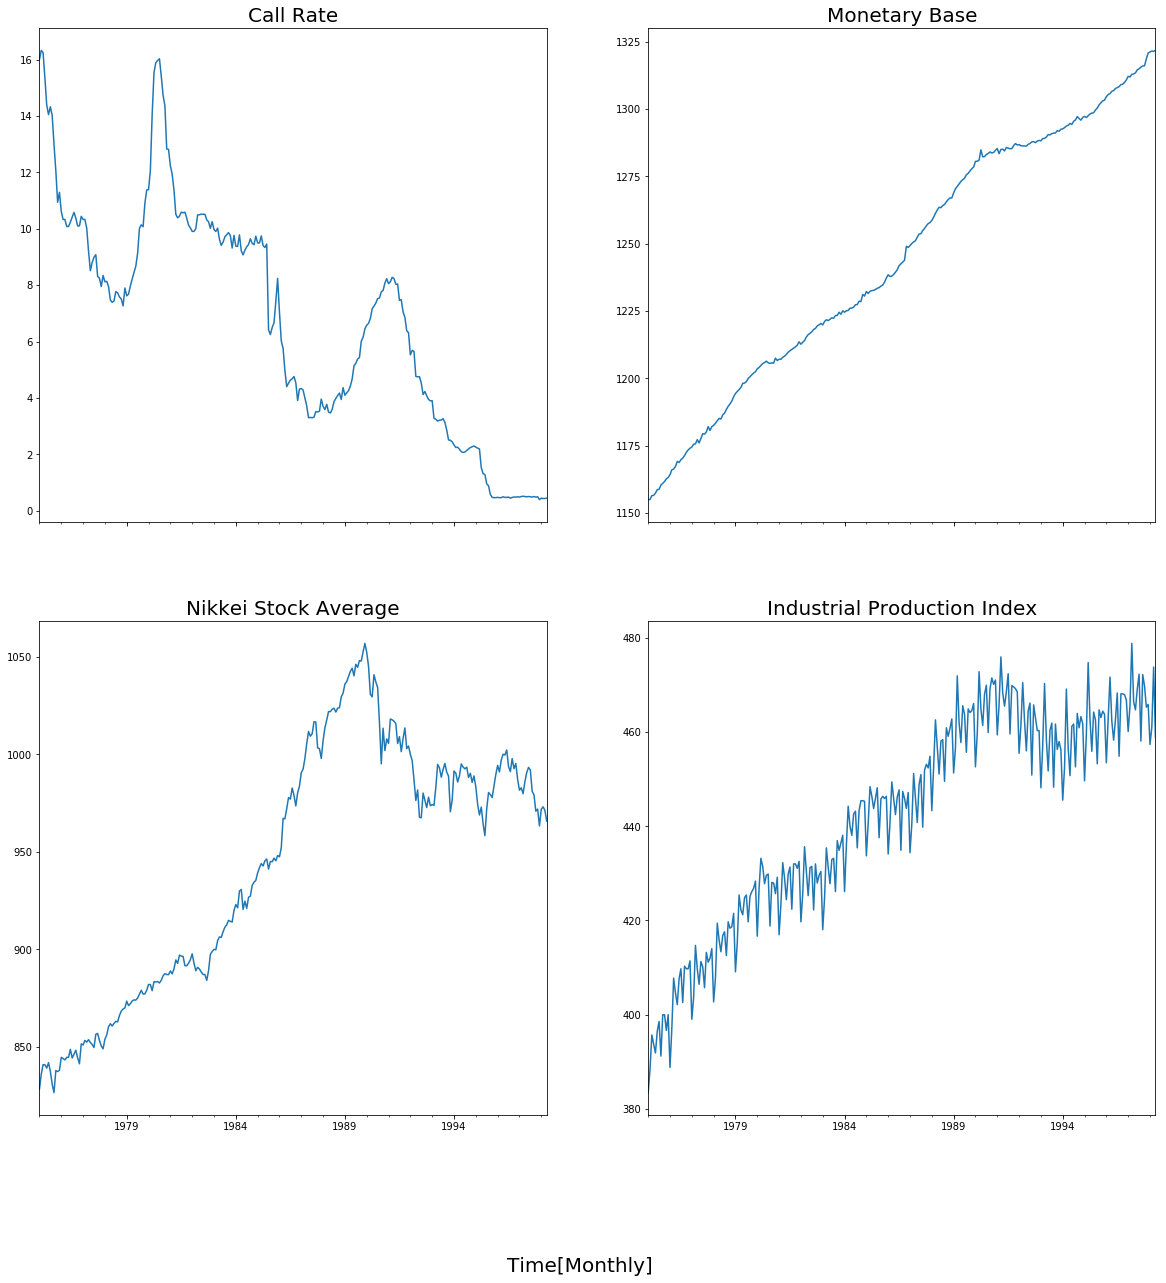

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, sharex=True, sharey=False, figsize=(20, 20))
r.plot(ax=axs[0, 0], legend=False)
m.plot(ax=axs[0, 1], legend=False)
p.plot(ax=axs[1, 0], legend=False)
y.plot(ax=axs[1, 1], legend=False)

axs[0, 0].set_title('Call Rate', size=20)
axs[0, 1].set_title('Monetary Base', size=20)
axs[1, 0].set_title('Nikkei Stock Average', size=20)
axs[1, 1].set_title('Industrial Production Index', size=20)
fig.text(0.5, 0.02, 'Time[Monthly]', ha='center', va='center', size=20)

plt.savefig("output/4_1.png", format='png', dpi=400)
plt.show()

<h2>2</h2>

In [11]:
import statsmodels.api as sm 

# ADF test for level variables
print()
print('ADF test for level variables')
adf_r = sm.tsa.stattools.adfuller(r['r'], regression='ct', autolag='AIC')
adf_m = sm.tsa.stattools.adfuller(m['m'], regression='ct', autolag='AIC')
adf_p = sm.tsa.stattools.adfuller(p['p'], regression='ct', autolag='AIC')
adf_y = sm.tsa.stattools.adfuller(y['y'], regression='ct', autolag='AIC')

print('###### r ######')
print('ラグ次数 : ', adf_r[2])
print('ADF統計量 : ', adf_r[0])
print('P値 : ', adf_r[1])
print('臨界値 : ', adf_r[4])
print('###### m ######')
print('ラグ次数 : ', adf_m[2])
print('ADF統計量 : ', adf_m[0])
print('P値 : ', adf_m[1])
print('臨界値 : ', adf_m[4])
print('###### p ######')
print('ラグ次数 : ', adf_p[2])
print('ADF統計量 : ', adf_p[0])
print('P値 : ', adf_p[1])
print('臨界値 : ', adf_p[4])
print('###### y ######')
print('ラグ次数 : ', adf_y[2])
print('ADF統計量 : ', adf_y[0])
print('P値 : ', adf_y[1])
print('臨界値 : ', adf_y[4])


# ADF test for delta variables
print()
print('ADF test for delta variables')

del_r = r - r.shift(1)
del_r.columns = ['del_r']
del_m = m - m.shift(1)
del_m.columns = ['del_m']
del_p = p - p.shift(1)
del_p.columns = ['del_p']
del_y = y - y.shift(1)
del_y.columns = ['del_y']

adf_delr = sm.tsa.stattools.adfuller(del_r['del_r'][1:], regression='c', autolag='AIC')
adf_delm = sm.tsa.stattools.adfuller(del_m['del_m'][1:], regression='c', autolag='AIC')
adf_delp = sm.tsa.stattools.adfuller(del_p['del_p'][1:], regression='c', autolag='AIC')
adf_dely = sm.tsa.stattools.adfuller(del_y['del_y'][1:], regression='c', autolag='AIC')

print('###### del_r ######')
print('ラグ次数 : ', adf_delr[2])
print('ADF統計量 : ', adf_delr[0])
print('P値 : ', adf_delr[1])
print('臨界値 : ', adf_delr[4])
print('###### del_m ######')
print('ラグ次数 : ', adf_delm[2])
print('ADF統計量 : ', adf_delm[0])
print('P値 : ', adf_delm[1])
print('臨界値 : ', adf_delm[4])
print('###### del_p ######')
print('ラグ次数 : ', adf_delp[2])
print('ADF統計量 : ', adf_delp[0])
print('P値 : ', adf_delp[1])
print('臨界値 : ', adf_delp[4])
print('###### del_y ######')
print('ラグ次数 : ', adf_dely[2])
print('ADF統計量 : ', adf_dely[0])
print('P値 : ', adf_dely[1])
print('臨界値 : ', adf_dely[4])


ADF test for level variables
###### r ######
ラグ次数 :  6
ADF統計量 :  -3.37577130268
P値 :  0.0547102021773
臨界値 :  {'1%': -3.9923195674201506, '10%': -3.1365748262826818, '5%': -3.4266955227512539}
###### m ######
ラグ次数 :  12
ADF統計量 :  -2.71520719829
P値 :  0.229822784247
臨界値 :  {'1%': -3.9930825608885456, '10%': -3.1367901284942237, '5%': -3.4270625811846833}
###### p ######
ラグ次数 :  0
ADF統計量 :  -0.5452651917
P値 :  0.981549005319
臨界値 :  {'1%': -3.9915897703304672, '10%': -3.1363688373100778, '5%': -3.4263443727704468}
###### y ######
ラグ次数 :  16
ADF統計量 :  -1.01750204549
P値 :  0.941712478842
臨界値 :  {'1%': -3.9936108014436673, '10%': -3.1369391540293634, '5%': -3.4273166669275947}

ADF test for delta variables
###### del_r ######
ラグ次数 :  5
ADF統計量 :  -4.74961873705
P値 :  6.78314119097e-05
臨界値 :  {'1%': -3.4545326116460702, '10%': -2.5724428548618659, '5%': -2.8721859575020017}
###### del_m ######
ラグ次数 :  11
ADF統計量 :  -2.5687149708
P値 :  0.0996371585323
臨界値 :  {'1%': -3.4550813975770827, '10%': -2

<h2>3</h2>

/Users/miura/.pyenv/versions/anaconda3-2.4.1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


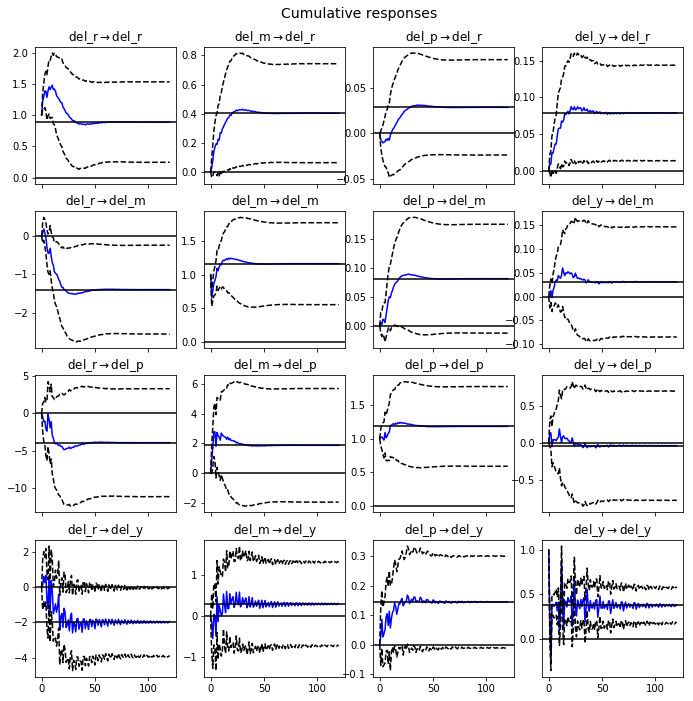

In [44]:
D_svar = pd.concat((del_r, del_m, del_p, del_y), axis=1)
D_svar = D_svar.iloc[1:, :]

A = np.array([["E",0, 0, 0], ["E", "E", 0, 0], ["E", "E", "E", 0], ["E", "E", "E", "E"]])
svar_model = sm.tsa.SVAR(D_svar, svar_type="A", A=A)
svar_result = svar_model.fit(maxlags=10)

svar_result.irf(120).plot_cum_effects()
plt.savefig('output/4_3.png', format='png', dpi=500)
plt.show()

<h2>4</h2>
レポート参照

<h2>5</h2>
<h3>・変数の順序を変更した場合</h3>

/Users/miura/.pyenv/versions/anaconda3-2.4.1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


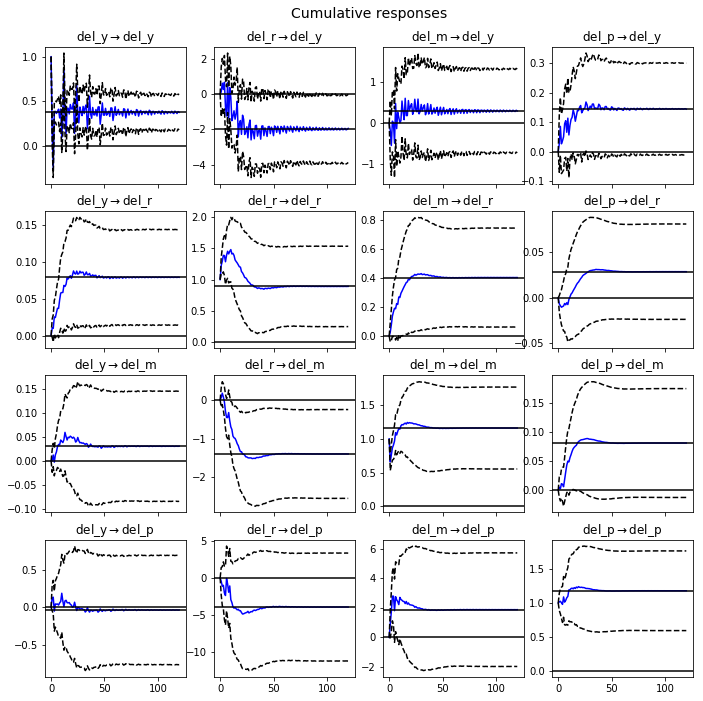

In [63]:
D_svar_1 = D_svar.ix[:, ['del_y', 'del_r', 'del_m', 'del_p']]
svar_model_1 = sm.tsa.SVAR(D_svar_1, svar_type="A", A=A)
svar_result_1 = svar_model_1.fit(maxlags=10)

svar_result_1.irf(120).plot_cum_effects()
plt.savefig('output/4_5_1.png', format='png', dpi=500)
plt.show()

<h3>・サンプル期間を変更した場合</h3>

########## impulse during the early period ##########


/Users/miura/.pyenv/versions/anaconda3-2.4.1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


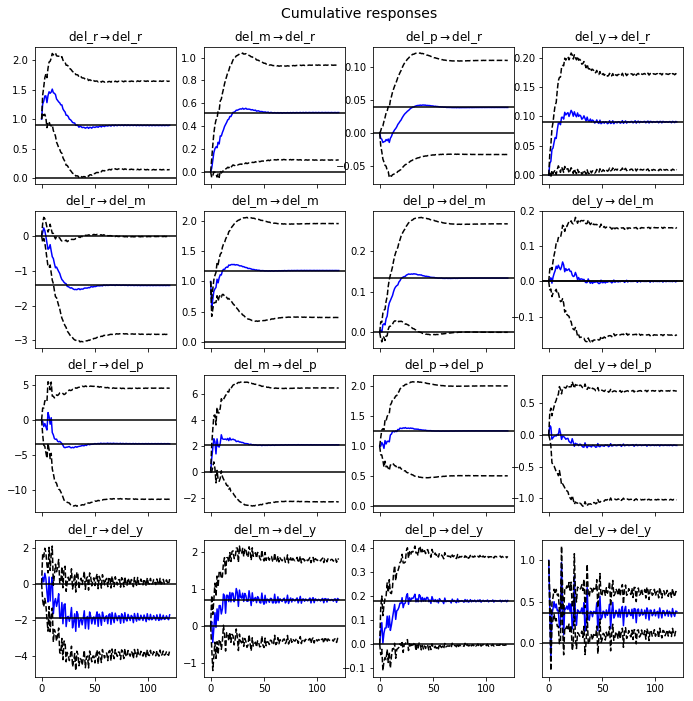

########## impulse during the late period ##########


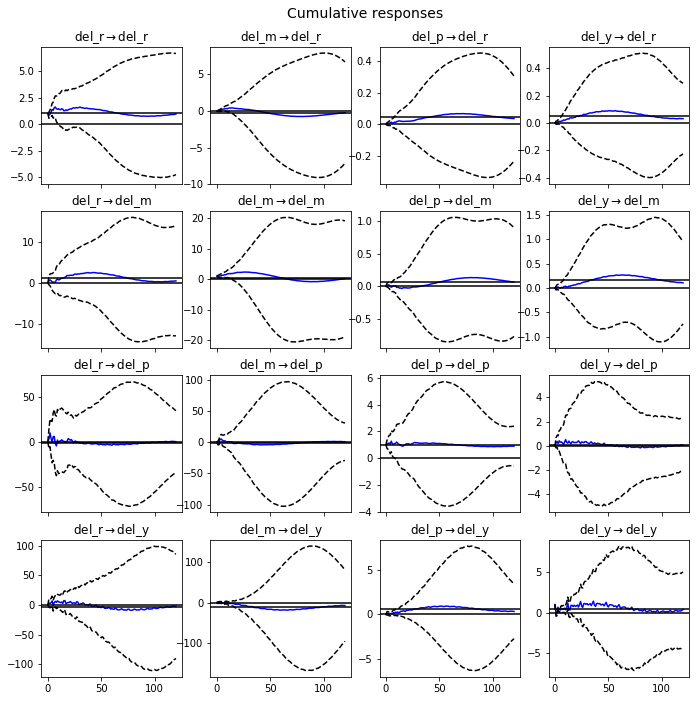

In [103]:
D_svar_early = D_svar[D_svar.index<=dt.datetime(1993, 12, 1)]
D_svar_late = D_svar[D_svar.index>=dt.datetime(1990, 9, 1)]

svar_model_early = sm.tsa.SVAR(D_svar_early, svar_type="A", A=A)
svar_result_early = svar_model_early.fit(maxlags=10)

svar_model_late = sm.tsa.SVAR(D_svar_late, svar_type="A", A=A)
svar_result_late = svar_model_late.fit(maxlags=10)

print('########## impulse during the early period ##########')
svar_result_early.irf(120).plot_cum_effects()
plt.show()

print('########## impulse during the late period ##########')
svar_result_late.irf(120).plot_cum_effects()
plt.show()

<h3>・ベンチマークモデルをレベルモデルで推定した場合</h3>

/Users/miura/.pyenv/versions/anaconda3-2.4.1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


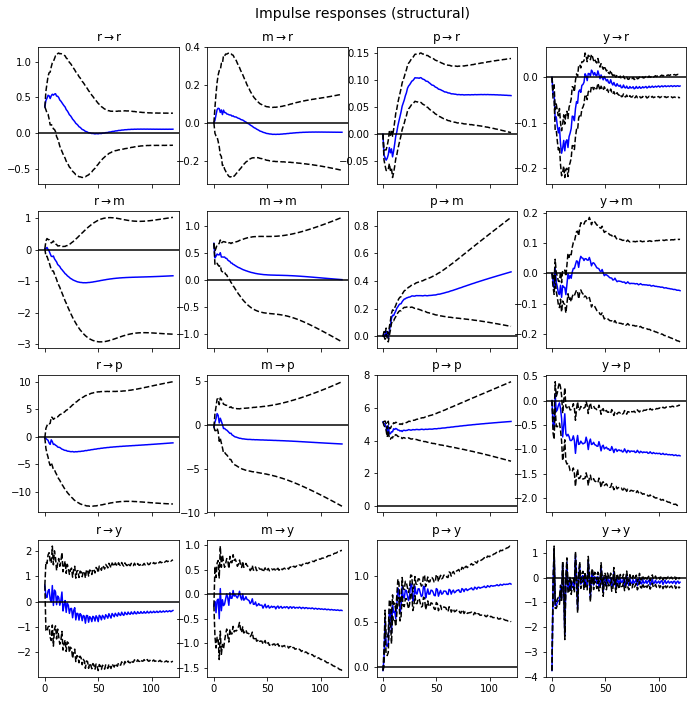

In [109]:
D_level = pd.concat((r, m, p, y), axis=1)
svar_model_level = sm.tsa.SVAR(D_level, svar_type="A", A=A)
svar_result_level = svar_model_level.fit(maxlags=10)

svar_result_level.irf(120).plot()
plt.savefig('output/4_5_3.png', format='png', dpi=500)
plt.show()